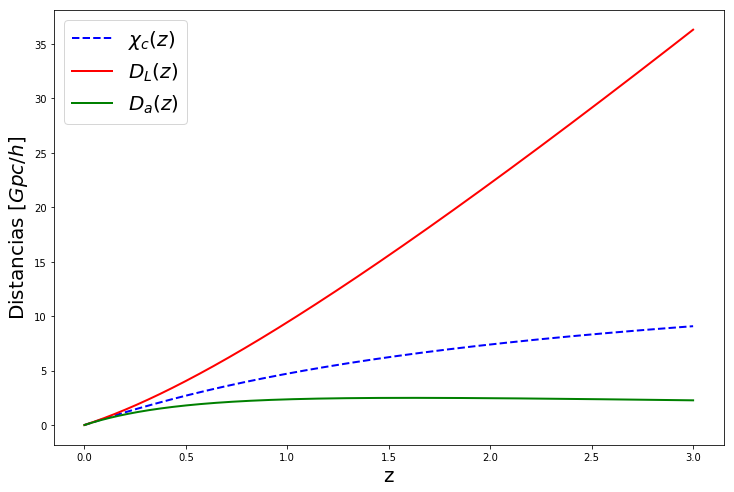

In [2]:
#Gabriel Karim Miranda Carrion        Agosto 2018

import numpy as np
import scipy.integrate as integrate #Integrador
import matplotlib.pyplot as plt #Graficador


#Este programa calcula la distancias comovil, luminosa y angular para un Universo con Omega_m = 0.3 y Omega_L = 0.7

Omega_m = 0.3 #Densidad de materia oscura
Omega_L = 0.7 #Densidad de const. cosmológica 
h = 0.7 #Parámetro de Hubble
Ho = 100*h #Constante de Hubble en km/s/Mpc
c = 299792.458 #Velocidad de la luz en km/s

size_arr = 10000 # Números de puntos 
N = np.linspace(0, 3., size_arr) #Intervalo de integración del Redshift


def E(x): #Está función es el integrando de la distancia comovil 

 return 1.0/np.sqrt((Omega_m*(1+x)**3)+(Omega_L))

def X_c(z): #Está función calcula la distancia comovil en unidades de Mpc

 inte = integrate.quad(E,0,z)

 return c*inte[0]/Ho  

def d_l(z): #Está función calcula la distancia luminosa en unidades de Mpc

 return (1+z)*X_c(z) 

def d_a(z): #Está función calcula la distancia angular en unidades de Mpc

 return X_c(z)/(1+z)  

X_c = np.vectorize(X_c) #Convierte la función distancia comovil en un vector
Xc_arr = (X_c(N)) # Vector de distancia comovil 
#print Xc_arr

d_l = np.vectorize(d_l) #Convierte la función distancia luminosa en un vector
dl_arr = (d_l(N)) # Vector de distancia luminosa
#print dl_arr

d_a = np.vectorize(d_a) #Convierte la función distancia angular en un vector
da_arr = (d_a(N)) # Vector de distancia angular
#print da_arr


plt.figure(figsize = (12,8))     # Indica el tamaño de la grafica (x,y) 
plt.plot(N, Xc_arr/(1000*h) , linestyle='--' , linewidth=2., color='b', label=r'$ \chi_c(z) $') # label will be use by plt.legend()
plt.plot(N, dl_arr/(1000*h) , linestyle='-' , linewidth=2., color='r', label=r'$D_L(z)$') # label will be use by plt.legend()
plt.plot(N, da_arr/(1000*h) , linestyle='-' , linewidth=2., color='g', label=r'$D_a(z)$') # label will be use by plt.legend()
plt.xlabel('z',fontsize=20)
plt.ylabel(r'Distancias $[Gpc/h]$',fontsize=20)
plt.legend(fontsize=20, loc=2)
plt.show()


#print d_l(1)
#print d_a(1)

